# N本腕バンディットの実験
greedy手法とepsilon-greedy手法を比較

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import mython

In [16]:
class NArmBandit:
    """N本腕バンディット。各行動(a)の報酬Q(a)は、平均Q*(a), 分散1のガウス分布に従っている
    Args:
        n (int) : 腕(行動)の数
    """
    def __init__(self, n=10):
        self.arms = 10
        self.true_rewards = np.random.normal(0.0, 1.0, self.arms)
        
    def get_reward(self, index):
        return np.random.normal(self.true_rewards[index], 1.0)


class Agent:
    """M個のN本腕バンディット環境。
    Args:
        m (int)
        n (int)
    """
    def __init__(self, m=2000, n=10):
        self.bandits = [NArmBandit(n) for _ in range(m)]
        self.sample_rewards = [[[] for _ in range(n)] for _ in range(m)]
        self.sample_mean_reward = np.zeros((m, n))
        
    def reset(self):
        self.sample_rewards = [[[] for _ in range(len(self.sample_rewards[0]))] 
                               for _ in range(len(self.sample_rewards))]
        self.sample_mean_reward[:] = 0

    def get_rewards(self, selected_indices):
        total_reward = 0
        for i, selected_idx in enumerate(selected_indices):
            reward = self.bandits[i].get_reward(selected_idx)
            self.sample_rewards[i][selected_idx].append(reward)
            self.sample_mean_reward[i, selected_idx] = np.mean(self.sample_rewards[i][selected_idx])
            total_reward += reward
        return total_reward

class Client:
    """ある戦略に沿ってM個のN本腕バンディットの報酬を獲得する
    """
    def __init__(self, m=2000, n=10, k=1000):
        self.agent = Agent(m, n)
        self.rewards = []
        self.m = m
        self.k = k
        
    def run(self):
        """k回の試行を行う
        """
        self.agent.reset()
        self.rewards = []
        for i in tqdm(range(self.k)):
            reward = self.agent.get_rewards(self.select_indices())
            self.rewards.append(reward / self.m)
            
    def select_indices(self):
        """
        """
        raise NotImplemented
        
        
class GreedyClient(Client):
    def select_indices(self):
        return self.agent.sample_mean_reward.argmax(axis=1)
    
class EpsilonGreedyClient(GreedyClient):
    def __init__(self, m=2000, n=10, k=1000, epsilon=0.1):
        super().__init__(m, n, k)
        self.epsilon = epsilon
        
    def select_indices(self):
        indices = super().select_indices()
        for idx, bandit in enumerate(self.agent.bandits):
            if np.random.rand() < self.epsilon:
                indices[idx] = np.random.randint(bandit.arms)
        return indices

In [9]:
client = GreedyClient()

mython.debug.start_pdb(
    client.run
)

100%|██████████| 1000/1000 [00:50<00:00, 19.73it/s]


In [17]:
eg_client = EpsilonGreedyClient()
eg_client.run()

100%|██████████| 1000/1000 [00:45<00:00, 21.98it/s]


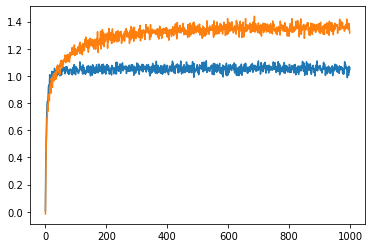

In [18]:
plt.plot(client.rewards)
plt.plot(eg_client.rewards)